<h1>Lesson 5. Model selection: City of Seattle Wage Data</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Space_Needle002.jpg/320px-Space_Needle002.jpg" style="height:200px;">
  
<p>In this exercise you will use recent wage data from City of Seattle to build a model that predicts hourly rate based on:</p>

<ul>
<li>Department</li>
<li>Last.Name</li>
<li>First.Name</li>
<li>Job.Title</li>
</ul>
<p>This dataset contains 12,346 entries in which we will try to predict 'Hourly.Rate'</p>


### Greg DeVore
### Introduction to Machine Learning
### February 12th, 2018

In [27]:
# Load the data
wage_url = "https://data.seattle.gov/api/views/2khk-5ukd/rows.csv?accessType=DOWNLOAD"
wage = read.csv(wage_url, stringsAsFactors=F)

head(wage)
str(wage)

Department,Last.Name,First.Name,Job.Title,Hourly.Rate
Arts and Culture,Boas-Du Pree,Sandra,Admin Staff Asst,34.48
Arts and Culture,Bolisay,Ronald,Publc Relations Spec,29.09
Arts and Culture,Chai,Grace,Cooperative Intern *,16.12
Arts and Culture,Childers,Calandra,"StratAdvsr3,Exempt",48.71
Arts and Culture,Crooks,Jennifer,Arts Prgm Spec,35.93
Arts and Culture,Davis,Lara,"StratAdvsr1,General Govt",39.29


'data.frame':	12346 obs. of  5 variables:
 $ Department : chr  "Arts and Culture" "Arts and Culture" "Arts and Culture" "Arts and Culture" ...
 $ Last.Name  : chr  "Boas-Du Pree" "Bolisay" "Chai" "Childers" ...
 $ First.Name : chr  "Sandra" "Ronald" "Grace" "Calandra" ...
 $ Job.Title  : chr  "Admin Staff Asst" "Publc Relations Spec" "Cooperative Intern *" "StratAdvsr3,Exempt" ...
 $ Hourly.Rate: num  34.5 29.1 16.1 48.7 35.9 ...


<h3>Q.1. Write a command that will calculate the number of unique values for each feature.</h3>

In [28]:
# Command(s)
sapply(wage, function(x) length(unique(x)))

Department   Last.Name  First.Name   Job.Title Hourly.Rate 
         36        7446        3319        1026        1730

<h3>Q.2. Write a command that will show mean wage for each department.</h3>

In [29]:
# Command (s):
require(plyr)
require(dplyr)
wage %>% group_by(Department) %>% summarize(Mean.Wage = mean(Hourly.Rate))

Department,Mean.Wage
Arts and Culture,34.90595
City Auditor,56.00900
City Budget Office,49.09900
City Employees Retirement Syst,49.01767
City Light,42.45070
Civil Service Commissions,16.03250
Community Police Commission,43.12000
Construction and Land Use,20.30667
Dept of Education & Early Lrng,41.17759
Dept of Finance & Admn Svc,39.36500


<h3>Q.3. For the 'Department' feature, create one-hot encodings for each department and add them to the data frame. (i.e. Department.Arts.and.Culture, Department.Legislative)</h3>

In [30]:
# Command(s) 
require(caret)
# Create dummyVars object using 'Department' feature
dmy <- dummyVars(~ Department, data = wage)
# Create data frame with expanded feature
dept.onehot <- data.frame(predict(dmy, newdata = wage))
cat('One-hot encoding of \'Department\' created',
    ncol(dept.onehot),'new features\n\n')
# Add to wage data frame
wage  <- cbind(wage,dept.onehot)
str(wage)

One-hot encoding of 'Department' created 36 new features

'data.frame':	12346 obs. of  41 variables:
 $ Department                              : chr  "Arts and Culture" "Arts and Culture" "Arts and Culture" "Arts and Culture" ...
 $ Last.Name                               : chr  "Boas-Du Pree" "Bolisay" "Chai" "Childers" ...
 $ First.Name                              : chr  "Sandra" "Ronald" "Grace" "Calandra" ...
 $ Job.Title                               : chr  "Admin Staff Asst" "Publc Relations Spec" "Cooperative Intern *" "StratAdvsr3,Exempt" ...
 $ Hourly.Rate                             : num  34.5 29.1 16.1 48.7 35.9 ...
 $ DepartmentArts.and.Culture              : num  1 1 1 1 1 1 1 1 1 1 ...
 $ DepartmentCity.Auditor                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DepartmentCity.Budget.Office            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DepartmentCity.Employees.Retirement.Syst: num  0 0 0 0 0 0 0 0 0 0 ...
 $ DepartmentCity.Light                    : num  0 0 0 0 0 0 0 0 

<h3>Q.4. Use the 'gender' library to determine gender of the person based on their First.Name.</h3>
<p>Note that the library returns the most likely gender and associated probability. Introduce IsMale feature to the 'wage' data.frame. Encode the probability in the 'wage' data.frame as log-odds with upper/lower boundary as +5/-5.</p>

In [31]:
#install.packages("gender")
require("gender")
#install.packages("devtools")
require(devtools)
#devtools::install_github("ropensci/genderdata")
require('genderdata')

# Commands
# Create data frame with names and birth year range (required for gender_df)
# Since birth year is not known, use range of 'ssa' data (1930-2012)
first.names <- data.frame(First.Name = wage$First.Name, 
                          min_year = 1930, max_year = 2012, 
                          stringsAsFactors = FALSE)
head(first.names)
# Calculate gender probabilities
gender.prob <- gender_df(first.names, name_col = 'First.Name', 
                         year_col = c("min_year","max_year"), method = 'ssa')
gender.prob  <- gender.prob %>% rename(First.Name = name)
# Add isMale and logodds features
gender.prob <- gender.prob %>% mutate(isMale = proportion_male >= 0.5,
                logOddsMale = log(proportion_male/(1-proportion_male)))
# Set upper/lower bounds on logodds
gender.prob$logOddsMale[gender.prob$logOddsMale > 5]  <- 5
gender.prob$logOddsMale[gender.prob$logOddsMale < -5]  <- -5
# View data frame
head(gender.prob)
# Make sure bounds have been set properly
cat('Summary of logOddsMale feature')
summary(gender.prob$logOddsMale)
# Merge data frames
cat('Number of rows in \'wage\' before merge =',nrow(wage),'\n')
cat('Number of rows in \'gender.prob\' =',nrow(gender.prob),'\n')
wage  <- merge(wage,gender.prob %>% 
               select(First.Name,isMale,logOddsMale), by = 'First.Name')
cat('Number of rows in \'wage\' after merge =',nrow(wage),'\n')

First.Name,min_year,max_year
Sandra,1930,2012
Ronald,1930,2012
Grace,1930,2012
Calandra,1930,2012
Jennifer,1930,2012
Lara,1930,2012


First.Name,proportion_male,proportion_female,gender,year_min,year_max,isMale,logOddsMale
Aaren,0.6918,0.3082,male,1930,2012,TRUE,0.808548
Aaron,0.9918,0.0082,male,1930,2012,TRUE,4.795387
Abbie,0.0100,0.9900,female,1930,2012,FALSE,-4.595120
Abdinasir,1.0000,0.0000,male,1930,2012,TRUE,5.000000
Abdirahim,1.0000,0.0000,male,1930,2012,TRUE,5.000000
Abdirahman,1.0000,0.0000,male,1930,2012,TRUE,5.000000


Summary of logOddsMale feature

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-5.0000 -5.0000 -0.9054 -0.2445  5.0000  5.0000 

Number of rows in 'wage' before merge = 12346 
Number of rows in 'gender.prob' = 2584 
Number of rows in 'wage' after merge = 11590 


Note that the number of rows in 'wage' is different before and after the merge. This means that there were
some names that were not found in the 'genderdata' database, and were therefore ignored in the merge.

<h3>Q.5. Are men paid more than women in the City of Seattle?</h3>

In [32]:
# Command to obtain the data
wage %>% filter(isMale == 1) %>% summarise(Mean.Wage.Men = mean(Hourly.Rate))
wage %>% filter(isMale == 0) %>% summarise(Mean.Wage.Women = mean(Hourly.Rate))
# Comment (one sentence)

Mean.Wage.Men
40.35264


Mean.Wage.Women
37.22998


Yes, on average, across all jobs, men make just over 3 dollars more per hour than women.

<h3>Q.6. Generate a Dracula Count feature for the Job.Title feature and attach it to the wage data.frame.</h3>

In [33]:
# Commands
# Create counts for each job and the probability of having that job (the
# number of people who have that job divided by the total number of people)
dracula.jobtitle  <- wage %>% group_by(Job.Title) %>% summarize(Job.Count = n(), 
    Dr_Count_Job.Title = Job.Count/nrow(wage))
# View data frame to see dracula count feature
head(dracula.jobtitle %>% arrange(-Dr_Count_Job.Title))
# Ensure new feature sums to 1 (it's the probability of having a given job)
cat('Sum of dracula count feature = ',
    sum(dracula.jobtitle$Dr_Count_Job.Title),'\n')
# Attach to wage data frame (remove probability for merge)
wage  <- merge(wage, dracula.jobtitle %>% select(-Job.Count), by = 'Job.Title')
# View selected features of merged data frame
head(wage %>% select(Last.Name, Department, Job.Title, Dr_Count_Job.Title) 
     %>% arrange(Last.Name))

Job.Title,Job.Count,Dr_Count_Job.Title
Pol Ofcr-Patrl,495,0.04270923
Fireftr-90.46 Hrs,340,0.02933563
Info Technol Prof B-BU,244,0.02105263
Stage Tech *,214,0.01846419
Pol Ofcr,203,0.01751510
Usher *,188,0.01622088


Sum of dracula count feature =  1 


Last.Name,Department,Job.Title,Dr_Count_Job.Title
Aagard,Police Department,Pol Sgt-Patrl,9.059534e-03
Aakervik,Police Department,Pol Ofcr-Detective,1.354616e-02
Abad,Seattle Information Technology,Info Technol Systs Anlyst,3.106126e-03
Abanes,Seattle Public Utilities,Wtr Treatment Op-WDM I,8.628128e-05
Abbott,City Light,Cblspl-Net Area,3.019845e-03
Abdi,Parks Department,Rec Attendant *,1.371872e-02


<h3>Q.7. Split the data to 70% train / 30% test. Train the linear model on the train dataset and evaluate its performance on the test dataset.</h3>
<p>The model should have the following features:</p>
<ul>
<li>One-hot encodings of the department</li>
<li>Two features related to gender</li>
<li>Dracula Count features for Job.Title</li>
</ul>

Number of training samples =  8112 
Number of test samples =  3478 



Call:
lm(formula = Hourly.Rate ~ ., data = wage.train %>% select(-c(Job.Title, 
    First.Name, Department, Last.Name)))

Residuals:
    Min      1Q  Median      3Q     Max 
-37.801  -8.209  -0.041   6.121 123.008 

Coefficients: (1 not defined because of singularities)
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                               41.29564    0.74993  55.066  < 2e-16
DepartmentArts.and.Culture                -3.78330    2.26920  -1.667 0.095506
DepartmentCity.Auditor                    17.43596    4.05002   4.305 1.69e-05
DepartmentCity.Budget.Office               9.80123    2.11577   4.632 3.67e-06
DepartmentCity.Employees.Retirement.Syst  10.48708    2.46040   4.262 2.05e-05
DepartmentCity.Light                       2.61644    0.49559   5.279 1.33e-07
DepartmentCivil.Service.Commissions      -21.46137    4.32643  -4.961 7.17e-07
DepartmentCommunity.Police.Commission     -7.07797   11.41511  -0.620 0.535241
DepartmentConstru

Warning message:
“not plotting observations with leverage one:
  1586, 2377”

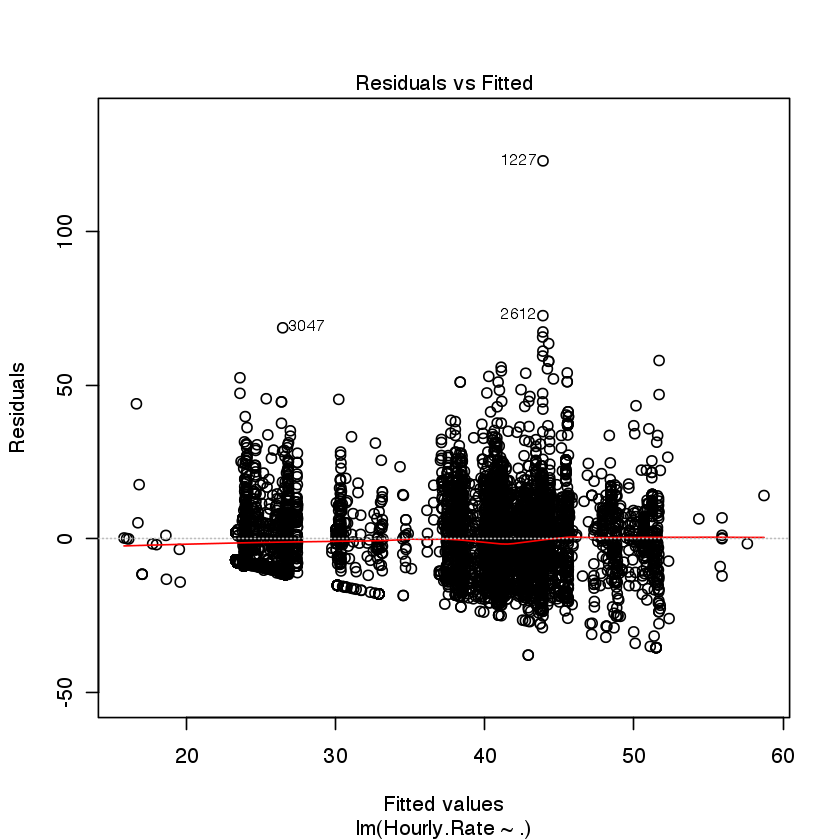

Warning message:
“not plotting observations with leverage one:
  1586, 2377”

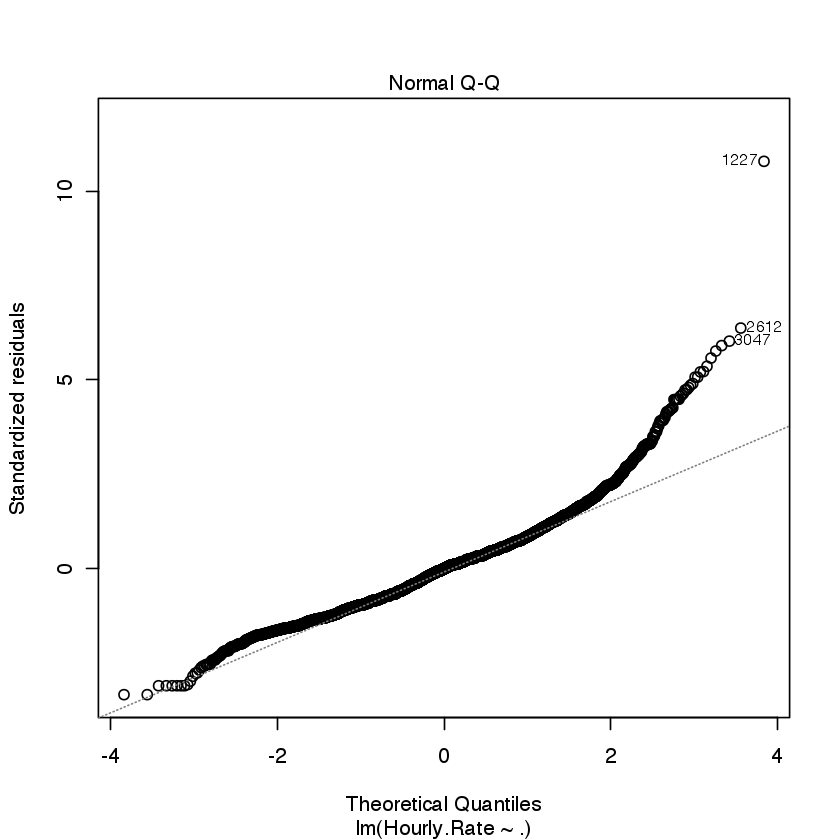

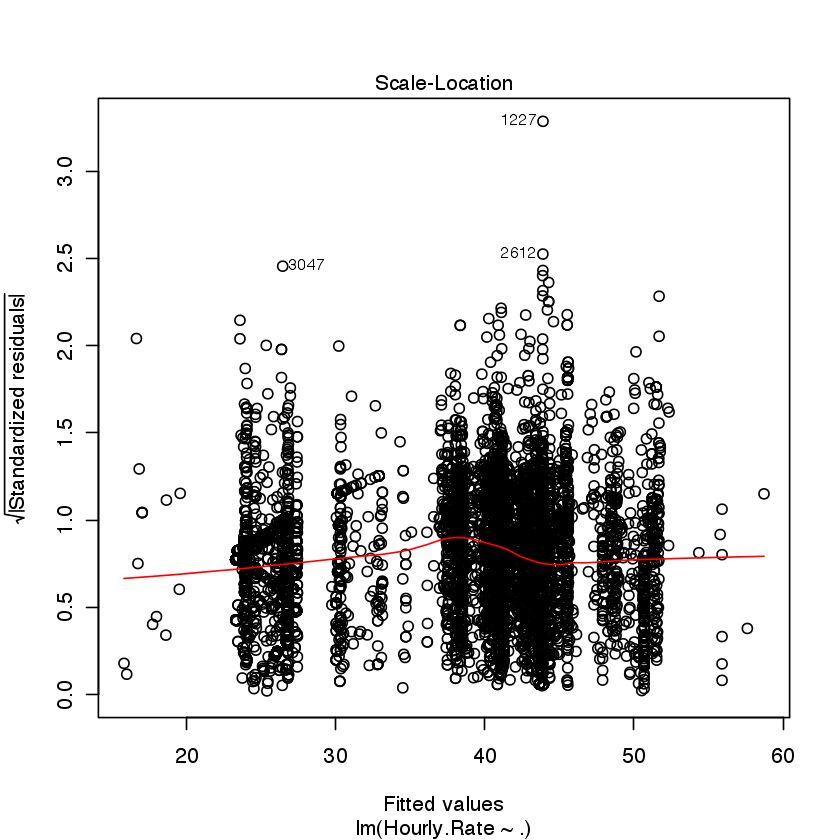

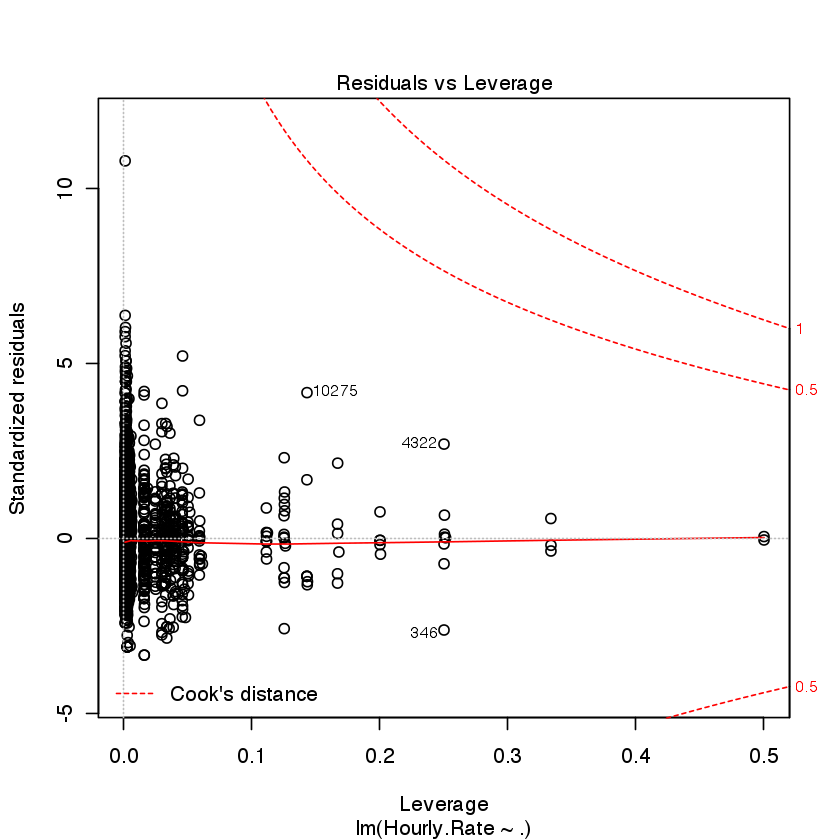

In [34]:
# Split the dataset into train / test
frac = 0.7
set.seed(0327)
trainInd  <- sample(nrow(wage), size = floor(frac*nrow(wage)), replace = FALSE)
wage.train  <- wage[trainInd,]
wage.test  <- wage[-trainInd,]
cat('Number of training samples = ',nrow(wage.train),'\n')
cat('Number of test samples = ',nrow(wage.test),'\n')
# Train the linear model on train dataset
# Remove raw job, name, and department features
wage.lm  <- lm(Hourly.Rate ~ ., wage.train %>% 
               select(-c(Job.Title, First.Name, Department, Last.Name)))
summary(wage.lm)
plot(wage.lm)

In [9]:
# Evaluate the model performance on test dataset
wage.predict  <- predict(wage.lm, newdata = wage.test)
wage.RMSD = sqrt(sum((wage.test$Hourly.Rate - wage.predict)^2)/(nrow(wage.test)))
cat('The RMSD of the predicted wages is ',wage.RMSD,'dollars\n')
cat('The mean wage is',mean(wage.test$Hourly.Rate),'dollars\n')

Warning message in predict.lm(wage.lm, newdata = wage.test):
“prediction from a rank-deficient fit may be misleading”

The RMSD of the predicted wages is  11.71532 dollars
The mean wage is 39.5393 dollars


The linear model to predict hourly wage has a relatively high RSE, low $R^2$ value, and low F-statistic. Looking at the coefficients, many are not significant, and because all department features were one-hot encoded, including all of them introduces multicollinearity (note the warning about predictions from a rank-deficient fit). Also, the model shows some heteroscedasticity, and the residuals are not normally distributed. Overall, this model is not usable in its current form (mostly due to the rank deficient warning).

The RMSD on the test data is approximately \$11.70, which is a large error given that the average wage is just under \$40. The RMSD value means that, on average, predicted wages are off by nearly \$12.

<h3>Q.8. Perform recursive feature elimination on the dataset. Plot RMSD on the test set as the function of number of features used in the model.</h3>

In [21]:
# Perform RFE
require(caret)
x.data  <- wage.train %>% select(-c(Job.Title, First.Name, 
                                   Department, Last.Name, Hourly.Rate))
y.data  <- wage.train$Hourly.Rate
x.test  <- wage.test %>% select(-c(Job.Title, First.Name, 
                                   Department, Last.Name, Hourly.Rate))
y.test  <- wage.test$Hourly.Rate
control <- rfeControl(functions=rfFuncs, method="cv", number=5, verbose = FALSE)
results  <- rfeIter(x = x.data, y = y.data, 
                    testX = x.test, testY = y.test, 
                    sizes = seq(1,ncol(x.data)), 
                metric = 'RMSE', maximize = FALSE, rfeControl = control)
# Plot RMSD as the function of # of features

Data frame with predicted wages:


,pred,obs,Variables
1,26.84946,34.74,39
2,42.96859,31.02,39
3,42.96913,34.74,39
17,41.21965,33.44,39
30,26.19121,44.90,39
31,43.54013,43.23,39


Minimum RMSE:


Variables,RMSE
30,9.45433


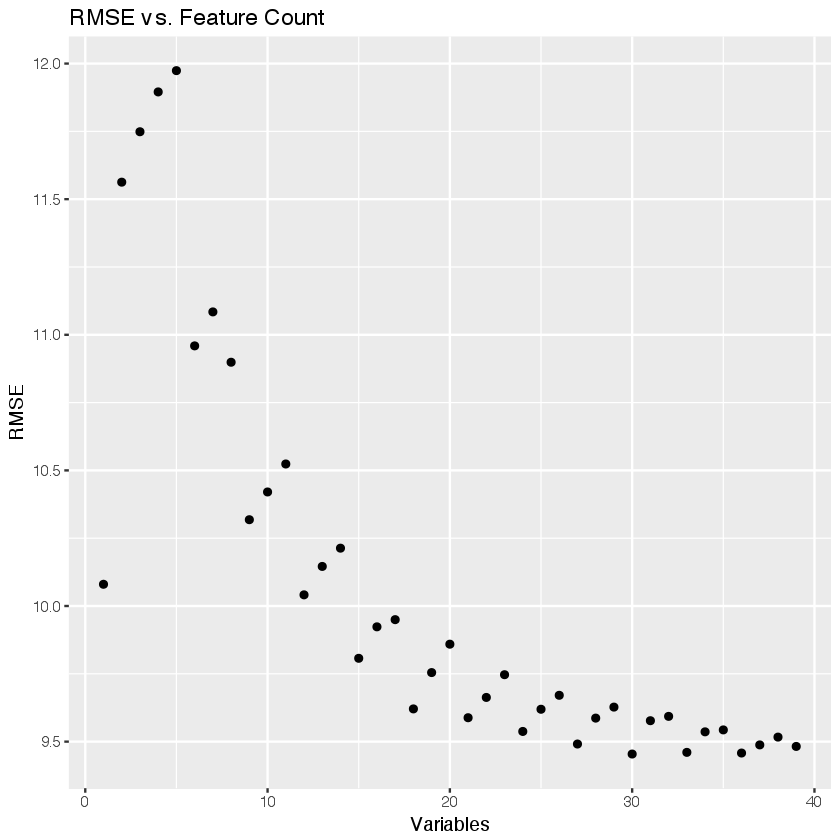

In [22]:
# Calculate RMSE for each model (different number of features per model)
cat('Data frame with predicted wages:\n')
head(results$pred)
recursiveRMSE  <- results$pred %>% group_by(Variables) %>% 
    summarize(RMSE = sqrt(sum((pred-obs)^2)/n()))
ggplot(recursiveRMSE, aes(x = Variables, y = RMSE)) + 
    geom_point() + ggtitle('RMSE vs. Feature Count')
# Find minimum RMSE
cat('Minimum RMSE:\n')
recursiveRMSE[which.min(recursiveRMSE$RMSE), ]

In [25]:
# Show features for model with 30 features (lowest RMSE)
results.row  <- 10
results$finalVariables[[results.row]]$var

[1] "Dr_Count_Job.Title"                      
 [2] "DepartmentParks.Department"              
 [3] "DepartmentSeattle.Center"                
 [4] "DepartmentPolice.Department"             
 [5] "DepartmentFire.Department"               
 [6] "DepartmentHuman.Services"                
 [7] "DepartmentSeattle.Information.Technology"
 [8] "logOddsMale"                             
 [9] "DepartmentCity.Light"                    
[10] "DepartmentSeattle.Public.Utilities"      
[11] "DepartmentDept.of.Finance...Admn.Svc"    
[12] "DepartmentSeattle.Dept.of.Transportation"
[13] "DepartmentCivil.Service.Commissions"     
[14] "DepartmentSeattle.Dept.of.Const.and.Insp"
[15] "isMale"                                  
[16] "DepartmentCity.Auditor"                  
[17] "DepartmentLegislative"                   
[18] "DepartmentCity.Budget.Office"            
[19] "DepartmentOffice.of.Housing"             
[20] "DepartmentPolice.Pension.System"         
[21] "DepartmentOffice.of.Sustainability...Env"
[22] "DepartmentOffice.of.Labor.Standards"     
[23] "DepartmentLegislative.City.Council"      
[24] "DepartmentOffice.for.Civil.Rights"       
[25] "DepartmentConstruction.and.Land.Use"     
[26] "DepartmentOffice.of.Ethics...Elections"  
[27] "DepartmentPlanning.and.Community.Develop"
[28] "DepartmentSeattle.Dept.of.HumanResources"
[29] "DepartmentImmigrant...Refugee.Affairs"   
[30] "DepartmentCity.Employees.Retirement.Syst"

In [26]:
# Create final model with chosen features (add on hourly rate)
# This will be the model for the Shiny app
features  <- c(results$finalVariables[[results.row]]$var,'Hourly.Rate')
wage.lm.final  <- lm(Hourly.Rate ~ .,wage[, features])
summary(wage.lm.final)


Call:
lm(formula = Hourly.Rate ~ ., data = wage[, features])

Residuals:
    Min      1Q  Median      3Q     Max 
-37.207  -8.366  -0.106   6.058 123.402 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               44.3953     0.9300  47.735  < 2e-16
Dr_Count_Job.Title                       -54.9431    12.4193  -4.424 9.78e-06
DepartmentParks.Department               -17.1137     0.8148 -21.004  < 2e-16
DepartmentSeattle.Center                 -16.2945     0.8680 -18.773  < 2e-16
DepartmentPolice.Department                1.6697     0.8160   2.046 0.040773
DepartmentFire.Department                  0.2608     0.8466   0.308 0.758070
DepartmentHuman.Services                 -10.9002     0.9647 -11.299  < 2e-16
DepartmentSeattle.Information.Technology   7.6760     0.8885   8.639  < 2e-16
logOddsMale                                0.5746     0.1147   5.011 5.49e-07
DepartmentCity.Light                      -0.5952

<h3>Q.9. Implement your model as a shiny app.</h3>
<p>In the app, the person should be able to input:</p>
<ul>
<li>Department (as drop-down list)</li>
<li>Gender (as drop-down list)</li>
<li>Job.Title (as drop-down list)</li>
</ul>
<p>and be given expected hourly salary</p>

In [19]:
# For this, create separate app.R file that you should submit together with the Jupyter notebook.